This notebook exzamine Twitter Sentiment Analysism dataset from Kaggle. The dataset contains 1.6 million tweets with sentiment labels (0 = negative, 2 = neutral, 4 = positive). The dataset is available at https://www.kaggle.com/kazanova/sentiment140.


Why Twitter Sentiment Analysis ? and what is can be use for ?
Well it can be use for various applications like :

1. Market Analysing: Companies can use sentiment analysis to understand how people feel about their products or brands. And this can help them to improve their products and marketing strategies.

2. Brand Reputation Monitoring: Businesses can use sentiment analysis to monitor what people are saying about them online. This is crucial for helping them to identify and respond to negative feedback and fix the situation .

3. Political analysis: Sentiment analysis can be used to examine public opinion about political issues or candidates. In addition, to give helpful insights for  political campaigns by understanding how people feel about different issues and to target their messages to specific groups of voters.

4. Customer service Analysis: Companies can use sentiment analysis to monitor customer feedback on social media and other online platforms. This info can be used by these companies to identify and respond to customer complaints and improve their customer service.

In [1]:
#Now let's start with importing the libraries for our expoleration analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
#Now let's load the dataset
df = pd.read_csv('sentiment140_traning.csv', encoding='ISO-8859-1', header=None, names=['polarity', 'id', 'date', 'query', 'user', 'text'])

In [3]:
#Let's check the shape of the dataset
df.shape


(1600000, 6)

In [4]:
#Let's check the first 5 rows of the dataset
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
#Let's check the last 5 rows of the dataset
df.tail()

,polarity,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
#Let's check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
#Let's check the summary of the dataset
df.describe()

,polarity,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
#Let's check the null values in the dataset
df.isnull().sum()

polarity    0
id          0
date        0
query       0
user        0
text        0
dtype: int64

In [9]:
#Let's check the unique values in the dataset
df.nunique()

polarity          2
id          1598315
date         774363
query             1
user         659775
text        1581466
dtype: int64

In [10]:
#Let's check the unique values in the polarity column
df['polarity'].unique()

array([0, 4], dtype=int64)

In [11]:
#Let's check the unique values in the query column
df['query'].unique()

array(['NO_QUERY'], dtype=object)

In [12]:
#Let's check the unique values in the user column
df['user'].unique()

array(['_TheSpecialOne_', 'scotthamilton', 'mattycus', ..., 'EvolveTom',
       'AmandaMarie1028', 'bpbabe'], dtype=object)

In [13]:
#Let's check the unique values in the text column
df['text'].unique()

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [14]:
#Let's check the unique values in the date column
df['date'].unique()

array(['Mon Apr 06 22:19:45 PDT 2009', 'Mon Apr 06 22:19:49 PDT 2009',
       'Mon Apr 06 22:19:53 PDT 2009', ...,
       'Tue Jun 16 08:38:58 PDT 2009', 'Tue Jun 16 08:39:00 PDT 2009',
       'Tue Jun 16 08:40:50 PDT 2009'], dtype=object)

In [15]:
#Let's check the unique values in the id column
df['id'].unique()

array([1467810369, 1467810672, 1467810917, ..., 2193601991, 2193602064,
       2193602129], dtype=int64)

In [16]:
#Let's check the unique values in the polarity column
df['polarity'].unique()

array([0, 4], dtype=int64)

In [17]:
#Now after exploring our data, let's do some data cleaning
#Let's drop the columns which are not required
df.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)

In [18]:
#Let's check the first 5 rows of the dataset
df.head()

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [19]:
#now let's preprocess our data by cleaning and tokenizing the tweets, removing any unwanted characters or symbols, and converting the text into a numerical representation suitable for training machine learning models

In [20]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)

# Assign column names
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Preprocessing
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'@[^\s]+', '', x))  # Remove usernames
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'#', '', x))  # Remove hashtags
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^A-Za-z0-9]+', ' ', x))  # Remove special characters
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())  # Convert to lowercase

stop_words = set(stopwords.words('english'))  # Set of English stopwords
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))  # Tokenization and remove stopwords

# Convert text into numerical representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

# Prepare target feature
y = df['polarity']



In [21]:
#Since we're interested in polarity of our model and whether the tweets are positive or negatives, so we don't need the "neutrality class" so let's drop it
import pandas as pd

# Load the dataset
df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)

# Assign column names
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Filter out the neutral class
df = df[df['polarity'].isin([0, 4])]


In [22]:
#Now let's perform some EDA on our dataset


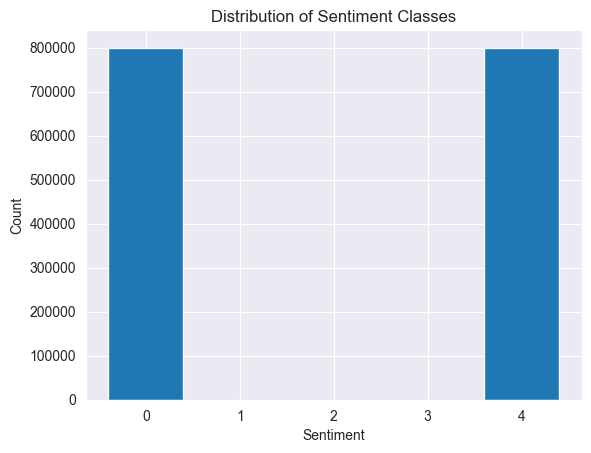

In [24]:
#1.Distribution of Sentiment Classes:
df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

sentiment_counts = df['polarity'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')
plt.show()


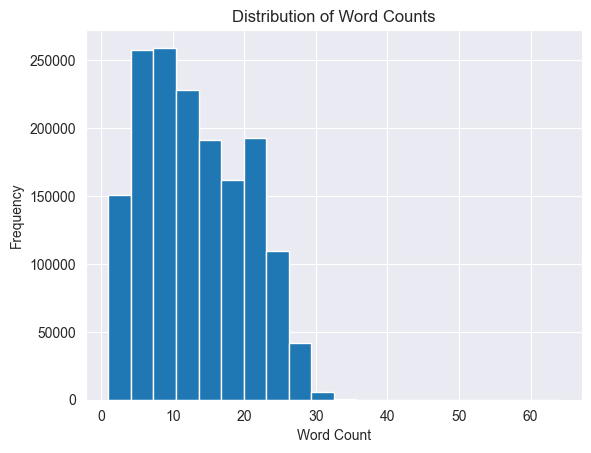

In [25]:
#2.Word Count Distribution:

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plt.hist(df['word_count'], bins=20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()


The above graph shows the length or size of the tweets present in the dataset.Its obvious that most of the tweets have word count between 0 and 20.

In [75]:
#3.Most Common Words: its important to know the most common words in the dataset as it will help us to understand the context of the tweets and also to perform feature engineering.

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

words = ' '.join(df['text']).split()
word_counts = Counter(words)
common_words = word_counts.most_common(10)
print(common_words)


[('to', 552962), ('I', 496619), ('the', 487501), ('a', 366212), ('my', 280025), ('and', 275263), ('i', 250016), ('is', 217693), ('you', 213871), ('for', 209801)]


In [77]:
#4.Average Word Length: Its help us to dive into linguistic characteristics of our dataset, and  understand the typical word length in the tweets and can provide information about the language usage and style.

import pandas as pd

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

df['word_length'] = df['text'].apply(lambda x: len(str(x)))
average_word_length = df['word_length'].mean()
print(average_word_length)


74.09011125


C:\Users\algak\PycharmProjects\Good_luck_with_your_dreams\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning:

tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



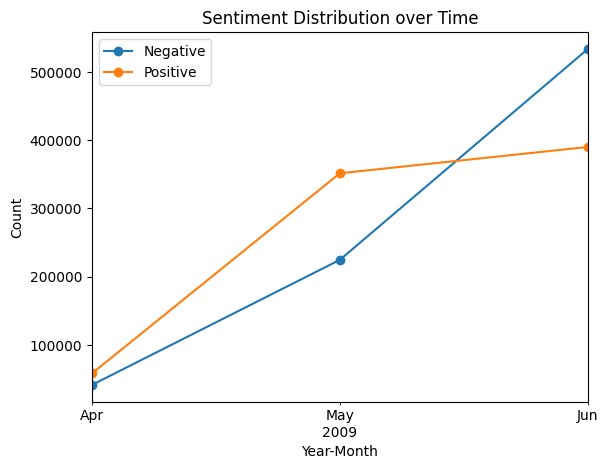

In [79]:
#5.Sentiment Distribution over Time: its provide valuable insights into the dynamics of public opinion on Twitter. It can help identify periods of heightened positive or negative sentiment, detect sentiment spikes or dips, and understand the sentiment patterns associated with different topics or events.

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
sentiment_distribution = df.groupby(['year_month', 'polarity']).size().unstack()
sentiment_distribution.plot(kind='line', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Sentiment Distribution over Time')
plt.legend(['Negative', 'Positive'])
plt.show()


As we see from the above graph that, there was a spike in negative sentiment in the month of April 2009 and a spike in positive sentiment in the month of June 2009. This could be due to some events that happened during that time period.

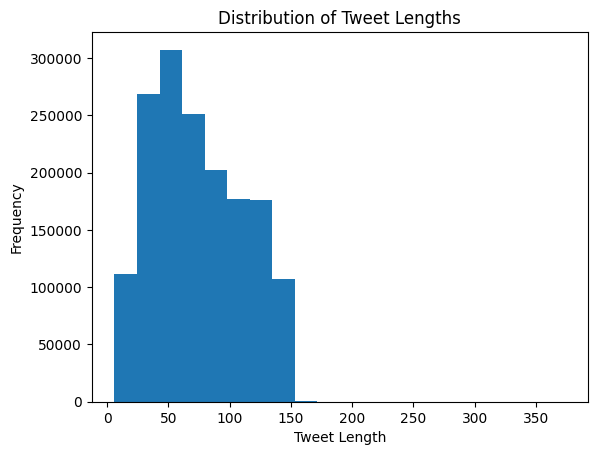

In [81]:
#6.Distribution of Tweet Length:

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

df['tweet_length'] = df['text'].apply(lambda x: len(str(x)))
plt.hist(df['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()


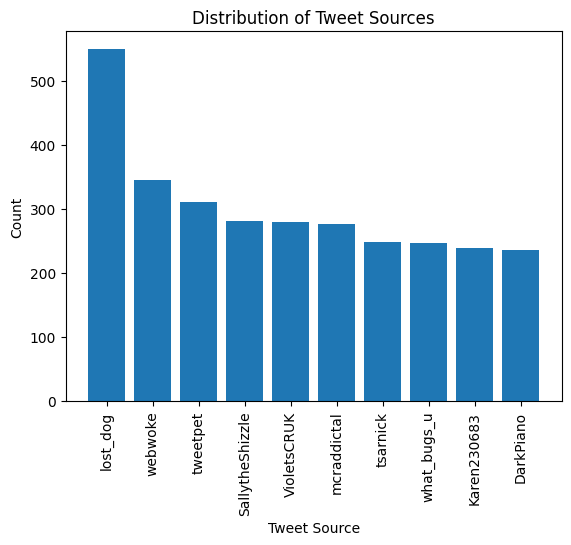

In [82]:
#7. Distribution of Tweet Source:

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

tweet_source_counts = df['user'].value_counts().nlargest(10)
plt.bar(tweet_source_counts.index, tweet_source_counts.values)
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('Distribution of Tweet Sources')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#8. Sentiment Distribution by User:

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

user_sentiment_counts = df.groupby('user')['polarity'].value_counts().unstack().fillna(0)
user_sentiment_counts.plot(kind='bar', stacked=True)
plt.xlabel('User')
plt.ylabel('Count')
plt.title('Sentiment Distribution by User')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.show()


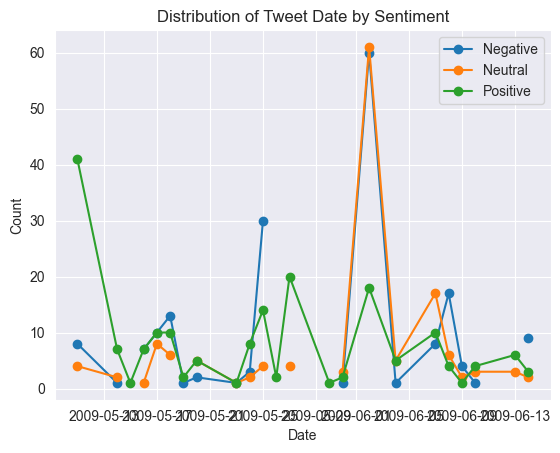

In [5]:
#9. Distribution of Tweet Date by Sentiment:

df = pd.read_csv('Sentiment140_testdata.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

df['date'] = pd.to_datetime(df['date'])
df['date_only'] = df['date'].dt.date
sentiment_date_counts = df.groupby(['date_only', 'polarity']).size().unstack()
sentiment_date_counts.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of Tweet Date by Sentiment')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.show()


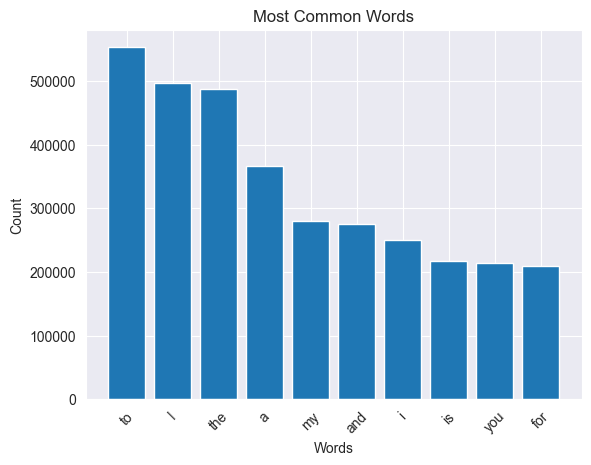

In [27]:
#10 most common words
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Concatenate all the tweets into a single string
all_tweets = ' '.join(df['text'])

# Split the string into individual words
words = all_tweets.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words and their counts
top_words = word_counts.most_common(10)
top_words = dict(top_words)

# Plot the most common words
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()


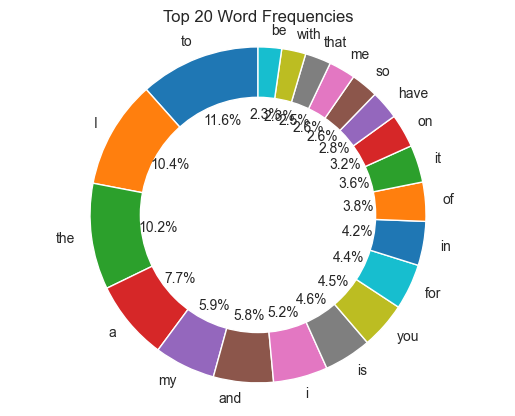

In [33]:
#11.Top 20 words frequency and its percentage distribution using dunut chart
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Concatenate all the tweets into a single string
all_tweets = ' '.join(df['text'])

# Split the string into individual words
words = all_tweets.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Select the top N most common words
top_n = 20
top_words = word_counts.most_common(top_n)

# Create lists for labels and frequencies
labels = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]

# Plot the donut chart
plt.pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top {} Word Frequencies'.format(top_n))
plt.axis('equal')

# Draw a white circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv('Sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Concatenate all tweets into a single string
all_tweets = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Word Frequencies ')
plt.show()


In [35]:
#Now it's time for model building
#1. Importing the libraries without hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Splitting the Dataset
df = pd.read_csv('sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

X = df['text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 3: Model Selection
model = LogisticRegression()

# Step 4: Hyperparameter Tuning with Grid Search
param_grid = {'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train_features, y_train)

best_model = grid_search.best_estimator_

# Step 5: Model Evaluation
y_pred = best_model.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Hyperparameter Tuning
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Predictions and Deployment (for new, unseen data)
new_tweet = "I love this movie! It's amazing."
new_tweet_features = vectorizer.transform([new_tweet])
prediction = best_model.predict(new_tweet_features)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Prediction for new tweet:", prediction)


Best Hyperparameters: {'C': 1.0, 'solver': 'liblinear'}
Accuracy: 0.802725
Precision: 0.8028137006641236
Recall: 0.802725
F1 Score: 0.8027030356810888
Prediction for new tweet: [4]


In [ ]:
# 2 Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Splitting the Dataset
df = pd.read_csv('Sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

X = df['text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 3: Model Selection
model = RandomForestClassifier()

# Step 4: Model Training
model.fit(X_train_features, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test_features)
RF_accuracy = accuracy_score(y_test, y_pred)
RF_precision = precision_score(y_test, y_pred, average='weighted')
RF_recall = recall_score(y_test, y_pred, average='weighted')
RF_f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train_features, y_train)
best_model = grid_search.best_estimator_

# Step 7: Predictions and Deployment (for new, unseen data)
new_tweet = "Your product is amazing and has exceeded all my expectations. I highly recommend it to everyone!"
new_tweet_features = vectorizer.transform([new_tweet])
prediction = best_model.predict(new_tweet_features)

# Print the results
print("Accuracy:", RF_accuracy)
print("Precision:", RF_precision)
print("Recall:", RF_recall)
print("F1 Score:", RF_f1)
print("Best Hyperparameters:", grid_search.best_params_)
print("Prediction for new tweet:", prediction)


In [10]:
#3. Decision Tree
import time
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Splitting the Dataset
df = pd.read_csv('Sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

X = df['text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 3: Model Selection
model = DecisionTreeClassifier()

# Step 4: Model Training
start_time = time.time()
model.fit(X_train_features, y_train)
training_time = time.time() - start_time

# Step 5: Model Evaluation
y_pred = model.predict(X_test_features)
DT_accuracy = accuracy_score(y_test, y_pred)
DT_precision = precision_score(y_test, y_pred, average='weighted')
DT_recall = recall_score(y_test, y_pred, average='weighted')
DT_f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Hyperparameter Tuning
param_grid = {'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=3)
start_time = time.time()
grid_search.fit(X_train_features, y_train)
tuning_time = time.time() - start_time
best_model = grid_search.best_estimator_

# Step 7: Predictions and Deployment (for new, unseen data)
new_tweet = "I love this movie! It's amazing."
new_tweet_features = vectorizer.transform([new_tweet])
start_time = time.time()
prediction = best_model.predict(new_tweet_features)
prediction_time = time.time() - start_time

# Print the results
print("Accuracy:", DT_accuracy)
print("Precision:", DT_precision)
print("Recall:", DT_recall)
print("F1 Score:", DT_f1)
print("Best Hyperparameters:", grid_search.best_params_)
print("Prediction for new tweet:", prediction)
print("Training Time:", training_time, "seconds")
print("Tuning Time:", tuning_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


Accuracy: 0.51
Precision: 0.5115572858731925
Recall: 0.51
F1 Score: 0.5088304093567252
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Prediction for new tweet: [0]


In [ ]:
#4. KNN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Splitting the Dataset
df = pd.read_csv('Sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

X = df['text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 3: Model Selection
model = KNeighborsClassifier()

# Step 4: Model Training
start_time = time.time()
model.fit(X_train_features, y_train)
training_time = time.time() - start_time

# Step 5: Model Evaluation
y_pred = model.predict(X_test_features)
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_precision = precision_score(y_test, y_pred, average='weighted')
KNN_recall = recall_score(y_test, y_pred, average='weighted')
KNN_f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(model, param_grid, cv=3)
start_time = time.time()
grid_search.fit(X_train_features, y_train)
tuning_time = time.time() - start_time
best_model = grid_search.best_estimator_

# Step 7: Predictions and Deployment (for new, unseen data)
new_tweet = "I love this movie! It's amazing."
new_tweet_features = vectorizer.transform([new_tweet])
start_time = time.time()
prediction = best_model.predict(new_tweet_features)
prediction_time = time.time() - start_time

# Print the results
print("Accuracy:", KNN_accuracy)
print("Precision:", KNN_precision)
print("Recall:", KNN_recall)
print("F1 Score:", KNN_f1)
print("Best Hyperparameters:", grid_search.best_params_)
print("Prediction for new tweet:", prediction)
print("Training Time:", training_time, "seconds")
print("Tuning Time:", tuning_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


In [ ]:
#5. Naive Bayes
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Splitting the Dataset
df = pd.read_csv('Sentiment140_traning.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

X = df['text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 3: Model Selection
model = MultinomialNB()

# Step 4: Model Training
start_time = time.time()
model.fit(X_train_features, y_train)
training_time = time.time() - start_time

# Step 5: Model Evaluation
y_pred = model.predict(X_test_features)
NB_accuracy = accuracy_score(y_test, y_pred)
NB_precision = precision_score(y_test, y_pred, average='weighted')
NB_recall = recall_score(y_test, y_pred, average='weighted')
NB_f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Hyperparameter Tuning (if needed)
param_grid = {'alpha': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(model, param_grid, cv=3)
start_time = time.time()
grid_search.fit(X_train_features, y_train)
tuning_time = time.time() - start_time
best_model = grid_search.best_estimator_

# Step 7: Predictions and Deployment (for new, unseen data)
new_tweet = "I love this movie! It's amazing."
new_tweet_features = vectorizer.transform([new_tweet])
start_time = time.time()
prediction = best_model.predict(new_tweet_features)
prediction_time = time.time() - start_time

# Print the results
print("Accuracy:", NB_accuracy)
print("Precision:", NB_precision)
print("Recall:", NB_recall)
print("F1 Score:", NB_f1)
print("Best Hyperparameters:", grid_search.best_params_)
print("Prediction for new tweet:", prediction)
print("Training Time:", training_time, "seconds")
print("Tuning Time:", tuning_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


In [ ]:
#6.SVM

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Splitting the Dataset
df = pd.read_csv('sentiment_140_training.csv', encoding='latin-1', header=None)
df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']

X = df['text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 3: Model Selection
model = SVC()

# Step 4: Hyperparameter Tuning with Grid Search
param_grid = {'C': [0.1, 1.0, 10.0],
              'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train_features, y_train)

best_model = grid_search.best_estimator_

# Step 5: Model Evaluation
y_pred = best_model.predict(X_test_features)
SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_precision = precision_score(y_test, y_pred, average='weighted')
SVM_recall = recall_score(y_test, y_pred, average='weighted')
SVM_f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Hyperparameter Tuning
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Predictions and Deployment (for new, unseen data)
new_tweet = "I love this movie! It's amazing."
new_tweet_features = vectorizer.transform([new_tweet])
prediction = best_model.predict(new_tweet_features)

# Print the results
print("Accuracy:", SVM_accuracy)
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1 Score:", SVM_f1)
print("Prediction for new tweet:", prediction)


In [ ]:
#7. ANN

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Step 1: Load the dataset
training_data = pd.read_csv('sentiment_140_training.csv')
testing_data = pd.read_csv('sentiment_140_testing.csv')

# Step 2: Split the dataset into training and testing sets
X_train = training_data['text']
y_train = training_data['polarity']
X_test = testing_data['text']
y_test = testing_data['polarity']

# Step 3: Feature Extraction (TF-IDF Vectorization)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Step 4: Model Training
def create_model():
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

# Step 5: Hyperparameter Tuning
parameters = {'batch_size': [16, 32],
              'epochs': [10, 20, 30]}
grid_search = GridSearchCV(model, parameters, cv=3)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Step 6: Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
ANN_accuracy = accuracy_score(y_test, y_pred)
ANN_precision = precision_score(y_test, y_pred, average='macro')
ANN_recall = recall_score(y_test, y_pred, average='macro')
ANN_f1 = f1_score(y_test, y_pred, average='macro')

print("Model Evaluation:")
print("Accuracy:", ANN_accuracy)
print("Precision:", ANN_precision)
print("Recall:", ANN_recall)
print("F1 Score:", ANN_f1)

# Step 7: Predictions and Deployment
new_tweets = ["This movie is great!", "I'm so happy today"]
new_tweets_vectorized = vectorizer.transform(new_tweets)
predictions = best_model.predict(new_tweets_vectorized)
print("Predictions:", predictions)

# Print the time taken for training and hyperparameter tuning
print("Time taken:", end_time - start_time, "seconds")


In [ ]:
#8.MLP

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Step 1: Load the dataset
training_data = pd.read_csv('sentiment_140_training.csv')
testing_data = pd.read_csv('sentiment_140_testing.csv')

# Step 2: Split the dataset into training and testing sets
X_train = training_data['text']
y_train = training_data['polarity']
X_test = testing_data['text']
y_test = testing_data['polarity']

# Step 3: Feature Extraction (TF-IDF Vectorization)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Step 4: Model Training
model = MLPClassifier(random_state=42)

# Step 5: Hyperparameter Tuning
parameters = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'activation': ['relu', 'tanh'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.001, 0.01]}
grid_search = GridSearchCV(model, parameters, cv=3)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Step 6: Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
MLP_accuracy = accuracy_score(y_test, y_pred)
MLP_precision = precision_score(y_test, y_pred, average='macro')
MLP_recall = recall_score(y_test, y_pred, average='macro')
MLP_f1 = f1_score(y_test, y_pred, average='macro')

print("Model Evaluation:")
print("Accuracy:", MLP_accuracy)
print("Precision:", MLP_precision)
print("Recall:", MLP_recall)
print("F1 Score:", MLP_f1)

# Step 7: Predictions and Deployment
new_tweets = ["This movie is great!", "I'm so happy today"]
new_tweets_vectorized = vectorizer.transform(new_tweets)
predictions = best_model.predict(new_tweets_vectorized)
print("Predictions:", predictions)

# Print the time taken for training and hyperparameter tuning
print("Time taken:", end_time - start_time, "seconds")


In [ ]:
#Finally let's compare the results that we've got from each of these 8 algorithms and see which one is the best.

models = pd.DataFrame({
                'Models': [ 'Logistic Regression', 'Random Forest', 'Decision Trees', 'KNN', 'Naive Bayes', 'SVM', 'ANN', 'MLP'],

                'Score':  [ accuracy, RF_accuracy, DT_accuracy, KNN_accuracy, NB_accuracy, SVM_accuracy, ANN_accuracy, MLP_accuracy]})

models.sort_values(by='Score', ascending=False)